# 4-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

In [544]:
#sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
from sklearn.datasets import load_diabetes

In [545]:
#diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
suger_ill = load_diabetes()

suger_ill.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [546]:
suger_ill.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [547]:
suger_ill.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [548]:
suger_ill.data.shape

(442, 10)

In [549]:
suger_ill.target.shape

(442,)

In [550]:
suger_ill.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [551]:
df_X = suger_ill.data
df_y = suger_ill.target

df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## (2) 모델에 입력할 데이터 X 준비하기

In [552]:
import numpy as np

In [553]:
df_X = np.array(df_X)
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## (3) 모델에 예측할 데이터 y 준비하기

## (4) train 데이터와 test 데이터로 분리하기

In [554]:
from sklearn.model_selection import train_test_split

In [555]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=2022)

In [556]:
X_train.shape

(353, 10)

In [557]:
X_test
#

array([[-0.09996055, -0.04464164, -0.06764124, -0.10895673, -0.07449446,
        -0.07271173,  0.01550536, -0.03949338, -0.04986847, -0.00936191],
       [-0.04910502, -0.04464164, -0.06440781, -0.10207099, -0.00294491,
        -0.01540556,  0.06336665, -0.04724262, -0.03324879, -0.05492509],
       [-0.02730979, -0.04464164,  0.04768465, -0.04698506,  0.03420581,
         0.05724488, -0.08021722,  0.13025177,  0.04506617,  0.13146972],
       [-0.00188202, -0.04464164, -0.03854032,  0.02187235, -0.10889328,
        -0.11561307,  0.02286863, -0.0763945 , -0.04687948,  0.02377494],
       [ 0.0562386 ,  0.05068012,  0.02181716,  0.05630106, -0.00707277,
         0.01810133, -0.03235593, -0.00259226, -0.02364456,  0.02377494],
       [ 0.03807591,  0.05068012,  0.0164281 ,  0.02187235,  0.03970963,
         0.04503209, -0.04340085,  0.07120998,  0.04976866,  0.01549073],
       [ 0.01991321,  0.05068012, -0.01267283,  0.07007254, -0.01120063,
         0.00714113, -0.03971921,  0.03430886

In [558]:
y_train
#훈련정답

array([150., 232., 164., 270.,  64.,  95., 182., 198., 220.,  44.,  90.,
       258.,  68.,  55.,  69.,  90., 100., 116., 108.,  96.,  91., 341.,
        89.,  42., 262., 152.,  72.,  74., 107., 167.,  63., 185.,  84.,
       232., 332., 263., 221.,  64., 128.,  75., 272.,  71.,  85., 113.,
       295.,  72., 150., 200.,  60., 114., 111., 268., 252., 214.,  90.,
       121., 302.,  90., 283., 129., 233.,  83., 310.,  94., 201., 139.,
       196., 143., 101.,  55., 160., 132.,  71.,  59.,  45.,  57., 141.,
       200., 162., 137.,  47., 277.,  99., 124., 281.,  61., 158., 115.,
       131., 346., 124., 110., 172., 118., 172., 178.,  37., 185.,  96.,
       156., 160., 178., 214.,  79., 178., 202., 163., 138.,  97.,  59.,
       144., 220., 229., 265., 292., 126.,  68.,  89., 174., 142.,  85.,
        74.,  50., 180.,  55., 206.,  25.,  91.,  71., 141., 198., 144.,
       321.,  77., 186., 297., 111.,  58., 135.,  48.,  66., 140., 270.,
        51., 104.,  42.,  84.,  52.,  93.,  63.,  8

In [559]:
y_test
#정답

array([ 55.,  96., 317.,  40., 178., 212.,  91.,  63., 243., 135., 115.,
       192.,  39., 142.,  87., 273., 148., 233., 258., 109., 170., 113.,
        67., 102., 258., 179., 275., 158., 142., 200.,  48., 152., 306.,
       138., 185.,  92.,  80., 233.,  60., 127., 109., 202.,  93., 134.,
       310.,  72.,  94., 199., 253., 310.,  81., 242.,  49.,  95., 275.,
       132., 163., 151.,  67.,  78., 235., 202., 118.,  63., 216., 195.,
        77., 241., 137.,  85., 236.,  72., 170.,  69.,  88., 288.,  73.,
       246.,  65., 219., 102.,  71.,  83., 244., 272., 154.,  64., 206.,
        86.])

## (5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [560]:
import numpy as np
# W = np.random.rand(10)
# b = np.random.rand()


# W = np.array([57.29109599, -107.76569658,  389.62926446,  292.26306318,
#          -16.46498356,  -63.25299674, -178.30455978,  109.1130273 ,
#          318.05270118,  157.92766394])
# b = 152.95342046071718
#3052.0806



# W = np.array([46.9669968 , -143.19738467,  432.62150136,  318.45989329,
#          -35.42282398,  -92.26369824, -189.30999912,  102.43293947,
#          353.90230508,  152.26114497])
# b = 153.00191145529212
#  2968.8733



W = np.array([  28.85279464, -193.41330045,  484.59553188,  348.11252415,
         -57.17545417, -128.26682846, -200.99410448,   92.6871945 ,
         407.16695556,  133.71383516])
b = 153.0618747025282
#2901

In [561]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기

- 손실함수를 MSE 함수로 정의해주세요.

In [562]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [563]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기

In [564]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## (8) 하이퍼 파라미터인 학습률 설정하기

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [565]:
LEARNING_RATE = 0.89

losses = []

for i in range(1, 800000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2899.8567
Iteration 20 : Loss 2898.4846
Iteration 30 : Loss 2897.2005
Iteration 40 : Loss 2895.9982
Iteration 50 : Loss 2894.8721
Iteration 60 : Loss 2893.8168
Iteration 70 : Loss 2892.8277
Iteration 80 : Loss 2891.9000
Iteration 90 : Loss 2891.0297
Iteration 100 : Loss 2890.2129
Iteration 110 : Loss 2889.4459
Iteration 120 : Loss 2888.7255
Iteration 130 : Loss 2888.0486
Iteration 140 : Loss 2887.4122
Iteration 150 : Loss 2886.8138
Iteration 160 : Loss 2886.2508
Iteration 170 : Loss 2885.7209
Iteration 180 : Loss 2885.2220
Iteration 190 : Loss 2884.7520
Iteration 200 : Loss 2884.3092
Iteration 210 : Loss 2883.8918
Iteration 220 : Loss 2883.4982
Iteration 230 : Loss 2883.1269
Iteration 240 : Loss 2882.7765
Iteration 250 : Loss 2882.4456
Iteration 260 : Loss 2882.1332
Iteration 270 : Loss 2881.8380
Iteration 280 : Loss 2881.5589
Iteration 290 : Loss 2881.2951
Iteration 300 : Loss 2881.0456
Iteration 310 : Loss 2880.8094
Iteration 320 : Loss 2880.5859
Iteration 330 : L

## (9) 모델 학습하기

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.


In [566]:
W, b

(array([   4.82162607, -235.07445037,  517.2244014 ,  368.79040457,
        -465.123597  ,  183.21024114,  -55.09170971,   83.81752251,
         644.94835296,   81.97954842]),
 152.99098267466456)

## (10) test 데이터에 대한 성능 확인하기

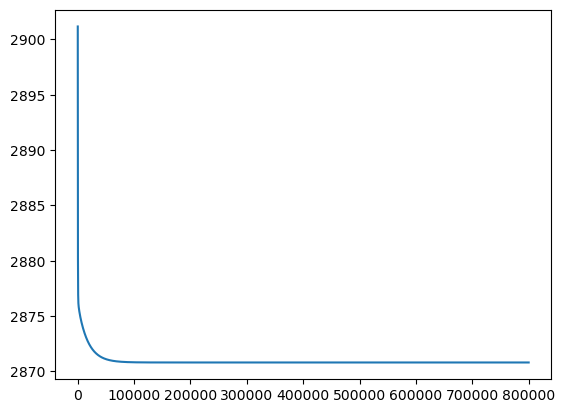

In [567]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [568]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2906.9354554330394

## (11) 정답 데이터와 예측한 데이터 시각화하기

- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

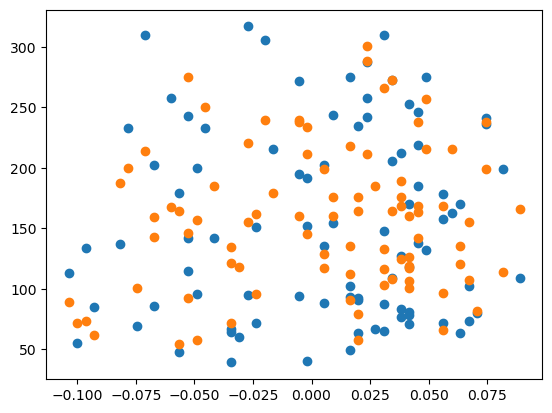

In [569]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 회고

로스 줄이는 방법을 몰라서, for문만 80만번 돌렸다..
LEARNING_RATE 비율을 높이는 조언을 통해 
for문을 아주 조금만 돌려도 된다는 것을 알게 되었다.. ㅎ;